## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset using an outer join
# returns all the rows from the left dataframe, all the rows from the right dataframe, and matches up rows where possible, with NaNs elsewhere
merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
merge_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Sort merged database by Tumor Volume to allow for median values to be correct
merge_data_sort = merge_data.sort_values(["Tumor Volume (mm3)"], ascending=True)

merge_data_sort.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


## Summary statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Identify the diferrent Drug Regimen along with the total tumer volume for each using .groupby
regimen_grouped = merge_data_sort.groupby(["Drug Regimen"])
regimen_grouped

#create a variable to capture the total tumor volume for each regimen
tumor_volume = regimen_grouped["Tumor Volume (mm3)"].sum()

#create computation for the mean of each regimen
regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()

#Create computation for the median of each regimen
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()

#Create computation for the variance of each regimen
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var()

#create computation for the standard deviation of each regimen
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()

#create computation for the SEM
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()


In [8]:
summary_stats = pd.DataFrame({"Total Tumor Volume": tumor_volume, "Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

#Format cells in Dataframe
summary_stats["Total Tumor Volume"] = summary_stats["Total Tumor Volume"]

summary_stats["Mean"] = summary_stats["Mean"]

summary_stats["Median"] = summary_stats["Median"]

summary_stats["Variance"] = summary_stats["Variance"]

summary_stats["Standard Deviation"] = summary_stats["Standard Deviation"]

summary_stats["SEM"] = summary_stats["SEM"]

summary_stats

,Total Tumor Volume,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,9355.420462,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,9361.228582,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,9413.493529,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,10384.299876,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,10105.671026,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,9780.078122,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,8423.930878,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,9169.417875,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,9816.199991,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

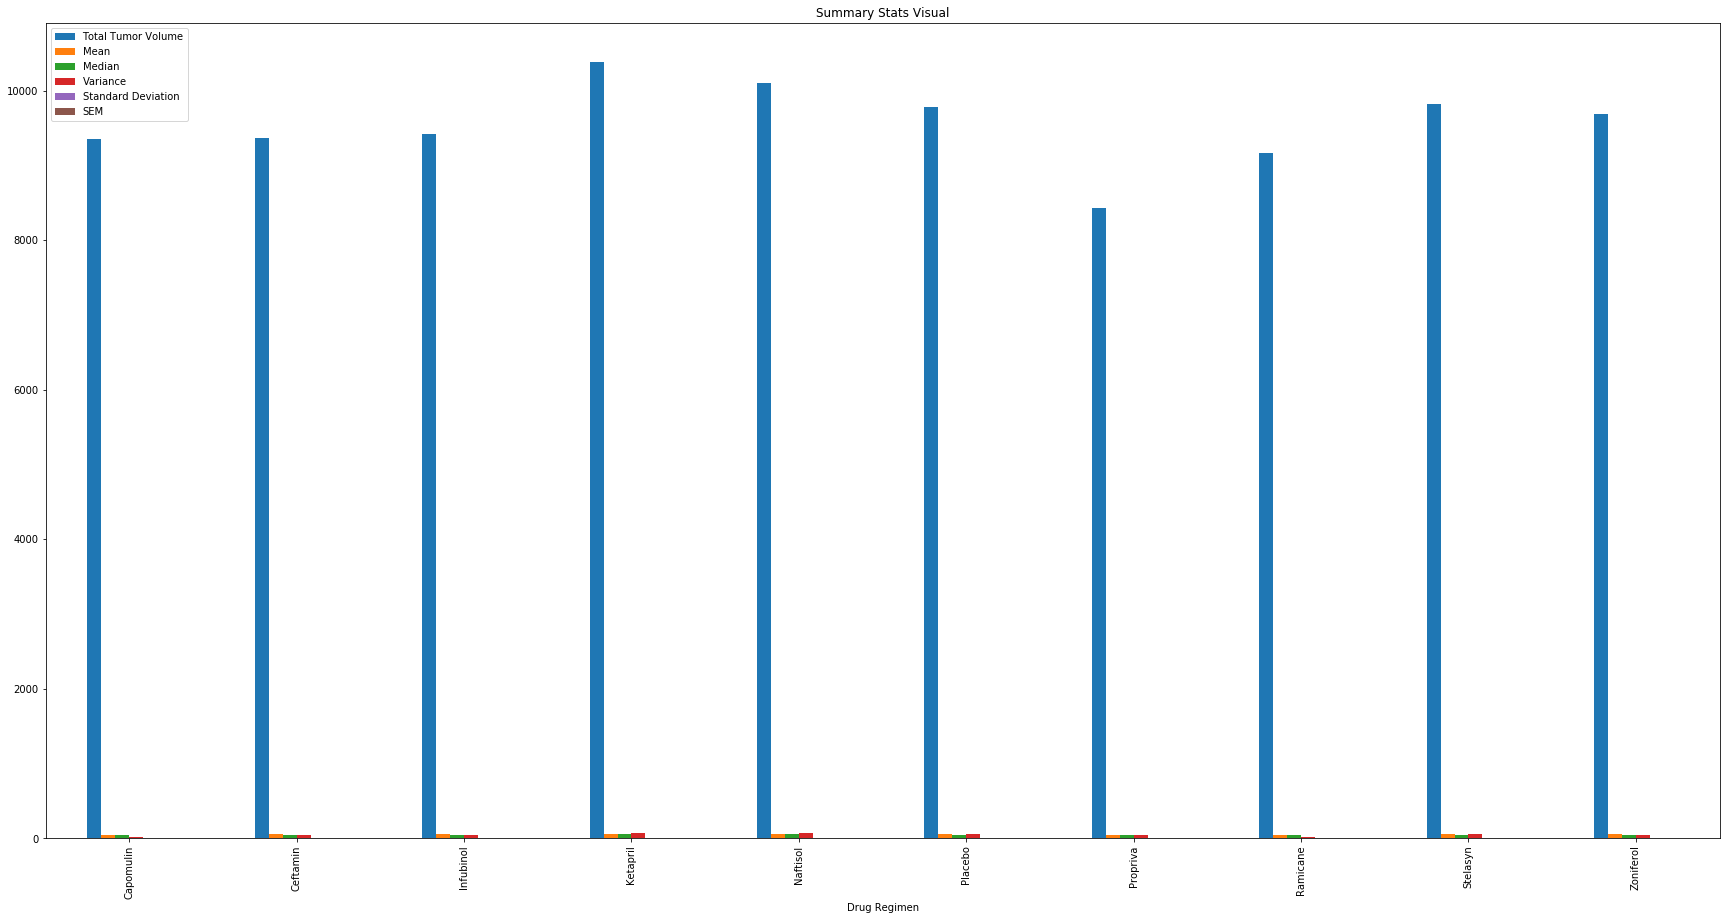

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
summary_stats.plot(kind="bar", figsize=(30,15))


#set chart title
plt.title("Summary Stats Visual")

#show chart and set layout
plt.show()
plt.tight_layout()


In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

## Pie plots

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
groupby_gender = merge_data.groupby(["Mouse ID","Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


In [ ]:
#create pie chart
mouse_gender.plot(kind="pie", figsize=(30,15))


#set chart title
plt.title("Summary Stats Visual")

#show chart and set layout
plt.show()
plt.tight_layout()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [17]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen